In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import itertools

In [13]:
data = pd.read_csv('featuresdf.csv')

In [14]:
data.head(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [15]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


In [16]:
data.size

1600

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

In [18]:
data.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#From the above code, we can understand that the following code has no null values present in it.

# Exploratory Data Analysis

In [19]:
data.head(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


<AxesSubplot:xlabel='name', ylabel='energy'>

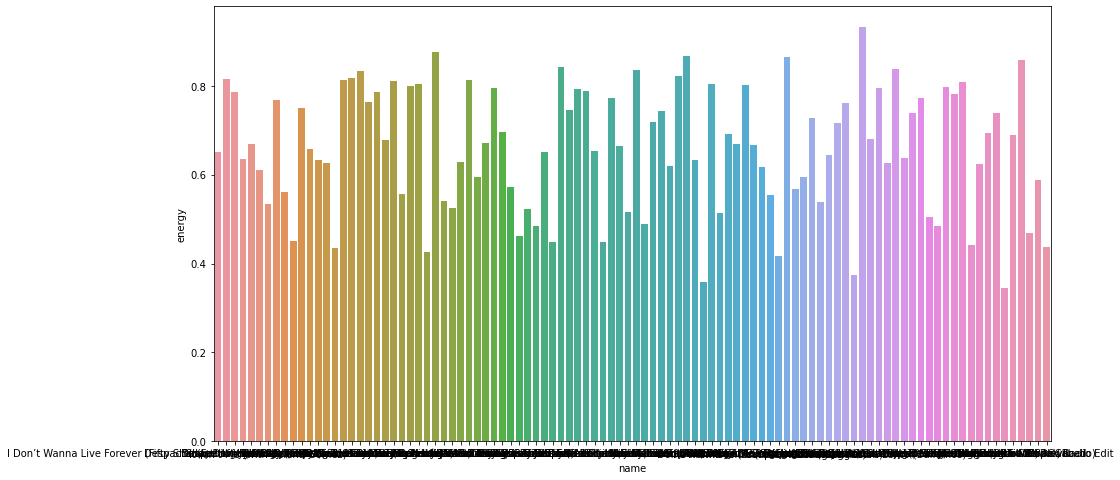

In [23]:
import matplotlib.pyplot as plt
plt.figure (figsize = (15,8))
sns.barplot (x = 'name', y = 'energy', data = data)

<AxesSubplot:xlabel='name', ylabel='energy'>

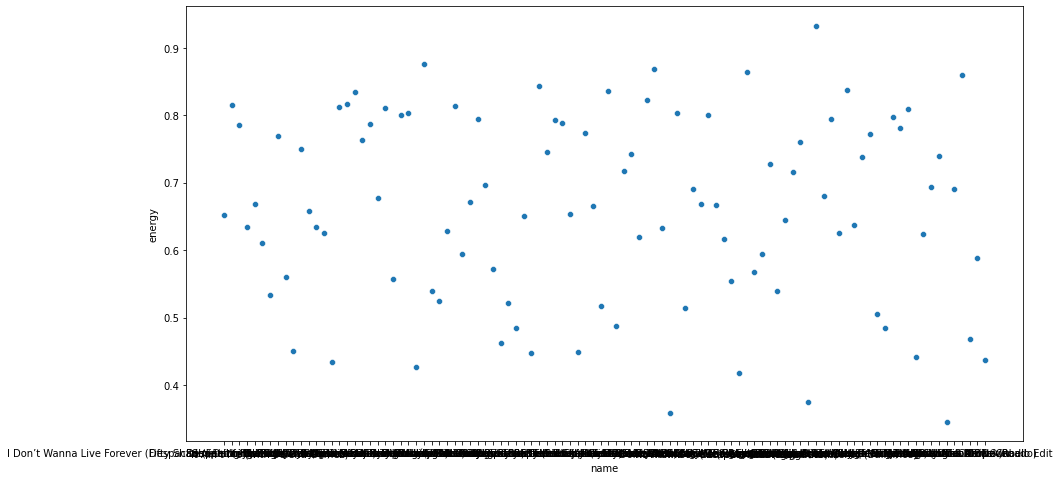

In [24]:
import matplotlib.pyplot as plt
plt.figure (figsize = (15,8))
sns.scatterplot (x = 'name', y = 'energy', data = data)

<AxesSubplot:xlabel='danceability', ylabel='energy'>

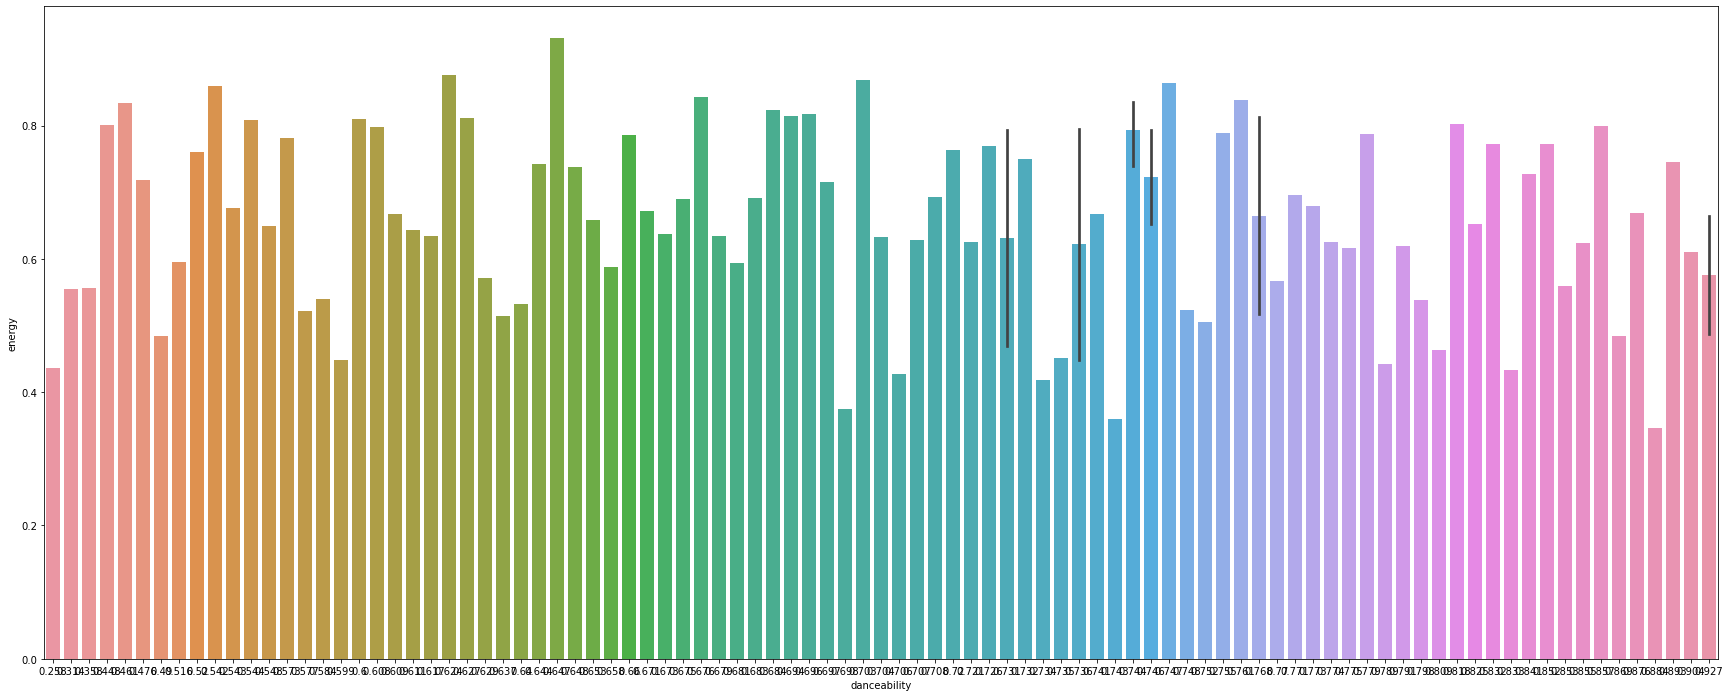

In [28]:
import matplotlib.pyplot as plt
plt.figure (figsize = (30,12))
sns.barplot (x = 'danceability', y = 'energy', data = data)

In [45]:
#Droping column
data.drop(['id'], axis = 1, inplace = True)

In [46]:
data.head(3)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


In [50]:
data.drop(['instrumentalness'], axis = 1, inplace = True)

In [51]:
data.head(3)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0931,0.931,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0924,0.813,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.1120,0.846,177.833,228200.0,4.0


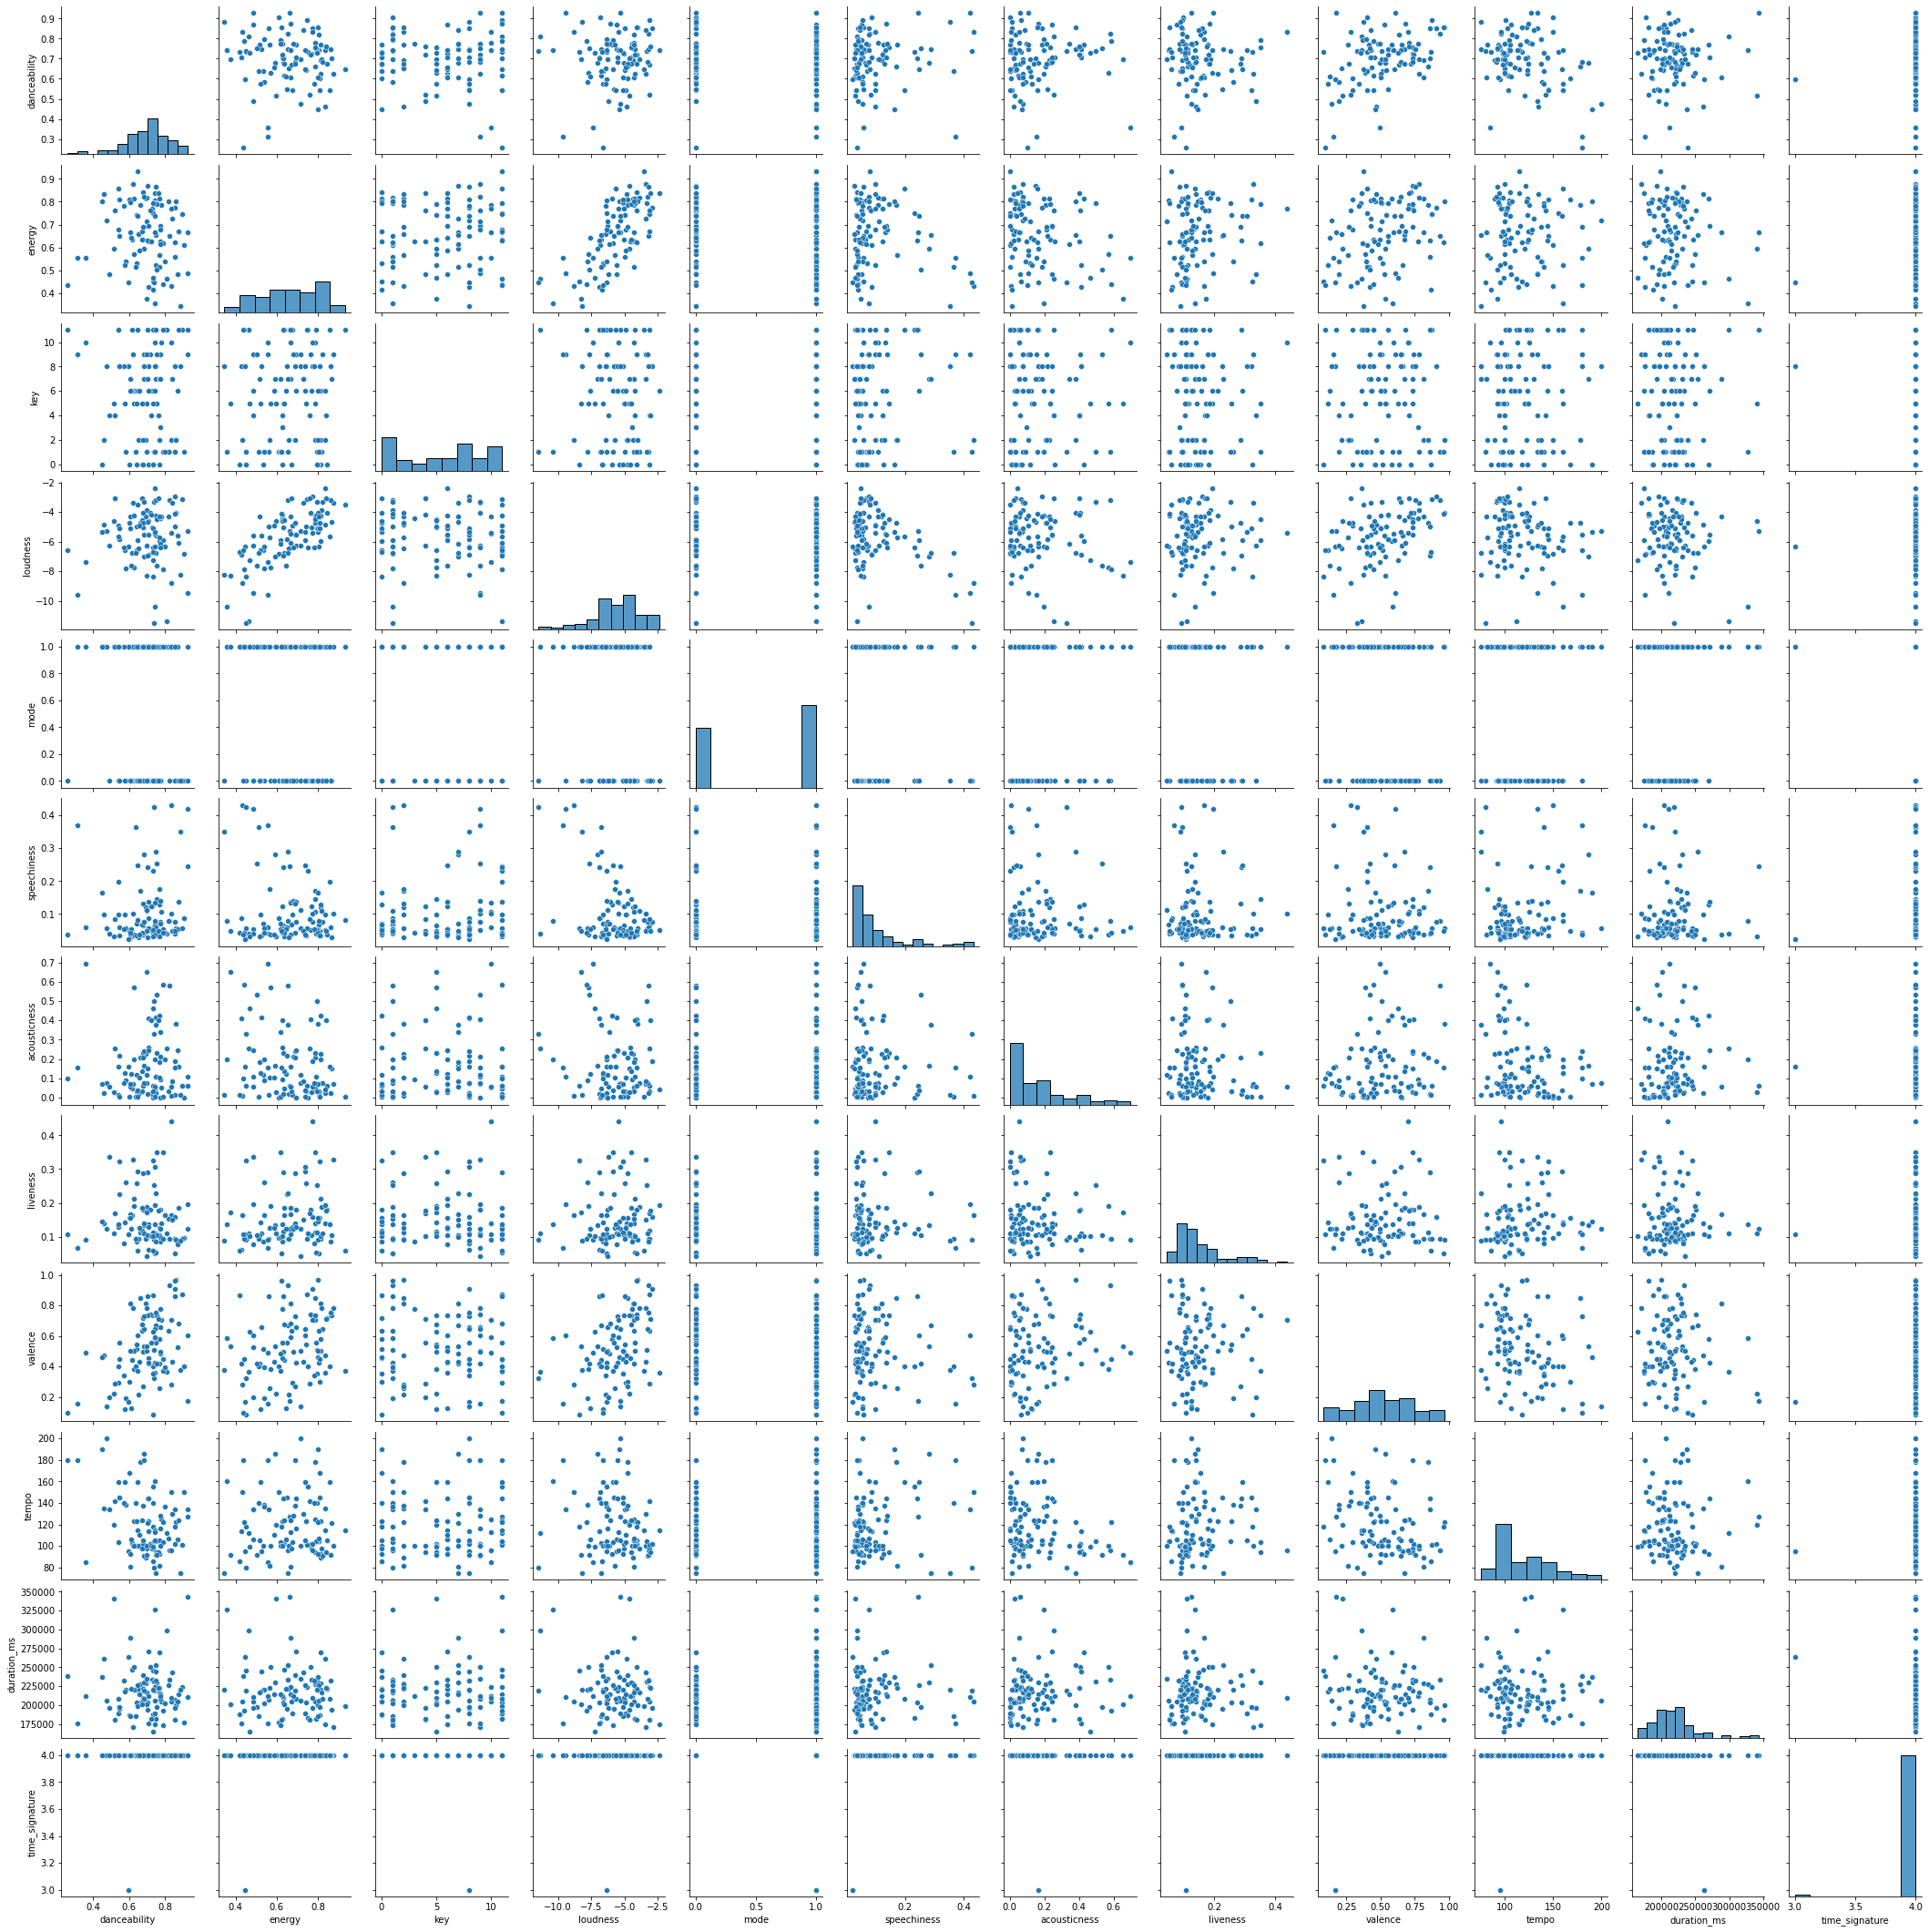

In [52]:
sns.pairplot(data)

In [56]:
data.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.057239,-0.068057,0.052759,-0.071724,0.111775,0.039398,-0.042014,0.423435,-0.364492,0.006038,0.078996
energy,-0.057239,1.000000,0.049560,0.709141,-0.078994,-0.206672,-0.253051,0.147744,0.321781,0.032676,-0.090013,0.154330
key,-0.068057,0.049560,1.000000,-0.053684,-0.164038,0.070721,0.021402,-0.012909,-0.023195,0.005246,0.006513,-0.065778
loudness,0.052759,0.709141,-0.053684,1.000000,-0.090640,-0.443359,-0.153320,0.060033,0.407731,-0.136692,-0.143251,0.036958
mode,-0.071724,-0.078994,-0.164038,-0.090640,1.000000,0.016506,0.066332,-0.000182,-0.023205,0.100207,0.114663,-0.085525
speechiness,0.111775,-0.206672,0.070721,-0.443359,0.016506,1.000000,-0.061942,-0.019815,-0.111576,0.172082,-0.011580,0.085775
acousticness,0.039398,-0.253051,0.021402,-0.153320,0.066332,-0.061942,1.000000,-0.135417,0.127241,-0.253404,0.038362,0.002003
liveness,-0.042014,0.147744,-0.012909,0.060033,-0.000182,-0.019815,-0.135417,1.000000,-0.000645,0.049356,-0.046741,0.057027
valence,0.423435,0.321781,-0.023195,0.407731,-0.023205,-0.111576,0.127241,-0.000645,1.000000,-0.291877,-0.120407,0.162900
tempo,-0.364492,0.032676,0.005246,-0.136692,0.100207,0.172082,-0.253404,0.049356,-0.291877,1.000000,-0.022200,0.087277
